In [ ]:
import pandas as pd
import numpy as np

In [ ]:
bird_dino_df = pd.read_csv("/content/drive/My Drive/bird_dino_data.csv")

In [ ]:
bird_dino_df.head()

,Species ID,Bird vs Dino,Body Mass (kg),Olfactory bulbs (cm3),Cerebrum (cm3),Optic Lobes (cm3),Cerebellum (cm3),Brain Stem (cm3),Brain Volume (cm3)
0,1,B,0.02,0.009,1.53,0.20,0.16,0.06,1.96
1,2,B,1.26,0.006,16.81,2.84,1.70,0.68,22.04
2,3,B,2.18,0.026,11.08,1.95,0.89,1.15,15.10
3,4,D,0.25,0.050,0.41,0.16,0.09,0.12,0.83
4,5,B,0.01,0.003,1.57,0.20,0.34,0.08,2.19


In [ ]:
len(bird_dino_df)

25

In [ ]:
#created two seperate data frames, one with bird and one with dino data
df_bird = bird_dino_df.loc[bird_dino_df["Bird vs Dino"] == "B"]
df_dino = bird_dino_df.loc[bird_dino_df["Bird vs Dino"] == "D"]
df_bird.head()

,Species ID,Bird vs Dino,Body Mass (kg),Olfactory bulbs (cm3),Cerebrum (cm3),Optic Lobes (cm3),Cerebellum (cm3),Brain Stem (cm3),Brain Volume (cm3)
0,1,B,0.02,0.009,1.53,0.20,0.16,0.06,1.96
1,2,B,1.26,0.006,16.81,2.84,1.70,0.68,22.04
2,3,B,2.18,0.026,11.08,1.95,0.89,1.15,15.10
4,5,B,0.01,0.003,1.57,0.20,0.34,0.08,2.19
7,8,B,0.90,0.234,5.95,0.99,0.96,0.55,8.68


In [ ]:
def brain_body(df, col1, col2): #finds brain to body ratio for dinos and birds
  body = df[col1] #sets the values of the body col. to the variable body
  brain = df[col2]#sets the values of the brain V col. to the variable brain
  df_ave = (brain/body)/1000 #takes the quotient of the two columns and converts kg to g
  return df_ave.mean() #finds the average of each brain/body ratio

In [ ]:
bird_brain_body = brain_body(df_bird, "Body Mass (kg)", "Brain Volume (cm3)")
print(bird_brain_body)

0.047832283820074345


In [ ]:
dino_brain_body = brain_body(df_dino, "Body Mass (kg)", "Brain Volume (cm3)")
print(dino_brain_body)

0.0016106496539985663


In [ ]:
def cerebrum_brain(df):
  cerebrum = df["Cerebrum (cm3)"]#sets the cerebrum col. to the variable cerebrum
  brain = df["Brain Volume (cm3)"]#sets the brain V col. to the variable brain
  cereBrainRatio = cerebrum/brain #finds the ratio of cerebrum to brain
  return cereBrainRatio.mean() #finds the average of the ratios

In [ ]:
bird_cere_brain = cerebrum_brain(df_bird)
print(bird_cere_brain)

0.6649507745281171


In [ ]:
dino_cere_brain = cerebrum_brain(df_dino)
print(dino_cere_brain)

0.4695339305450895


In [ ]:
def prediction(femur, brainV, cerebrumW, wholeBrainW):
  bodymass = 10**(3.1854*np.log10(femur)-3.184)/1000 #calculates the body mass using the femur
  brainBodyRatio = (brainV/bodymass)/1000 #calculate brain to body ratio 
  cerebrumBrainRatio = cerebrumW/wholeBrainW #calculate cerebrum to brain ratio
  diff_BBratio_bird = (brainBodyRatio - bird_brain_body)#finds difference in both brain/body ratios (bird)
  diff_CBratio_bird = (cerebrumBrainRatio - bird_cere_brain)#finds difference in both cerebrum/brain ratios (bird)
  diff_BBratio_dino = (brainBodyRatio - dino_brain_body) #same as the line above but for dino ratio
  diff_CBratio_dino = (cerebrumBrainRatio - dino_cere_brain) #same as the line above but for dino ratio  
  if diff_BBratio_bird < diff_BBratio_dino: #if the bird ratio difference is smaller, it is a bird   
    result = "bird"
  elif diff_BBratio_dino < diff_BBratio_bird:
    result = "dino"
  if diff_CBratio_bird < diff_CBratio_dino:
    result2 = "bird"
  elif diff_CBratio_dino < diff_CBratio_bird: #if the dino ratio difference is smaller, it is a dino
    result2 = "dino"
  return result, result2

In [ ]:
prediction(70, 1.44, 0.6, 1.44)

('bird', 'bird')

In [ ]:
bodymass = 10**(3.1854*np.log10(70)-3.184)/1000 #calculates the body mass using the femur
brainBodyRatio = (1.44/bodymass)/1000 #calculate brain to body ratio
print(brainBodyRatio) 

0.0029173409990088228


In [ ]:
import matplotlib.pyplot as plt


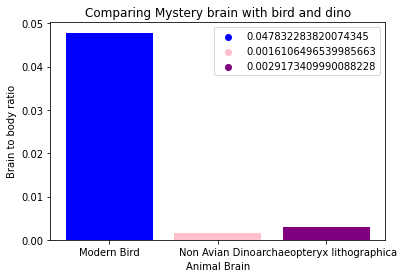

In [ ]:
plt.bar([1,2,3],[bird_brain_body, dino_brain_body, brainBodyRatio], color =["blue", "pink","purple"])#allows us to create colored bars
plt.xticks([1,2,3],["Modern Bird" , "Non Avian Dino",  "archaeopteryx lithographica"])#names the bar
plt.xlabel("Animal Brain")#x label
plt.ylabel("Brain to body ratio")#y label
plt.title("Comparing Mystery brain with bird and dino")#title
plt.scatter([],[], color = "blue", label = "0.047832283820074345")#allows us to color cooridinate the legend with the labels
plt.scatter([],[], color = "pink", label = "0.0016106496539985663")#allows us to color cooridinate the legend with the labels
plt.scatter([],[], color = "purple", label = "0.0029173409990088228")#allows us to color cooridinate the legend with the labels
plt.legend(bbox_to_anchor=[1.0,1.0])#moves the lengend box
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
